In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13288.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/24201.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26556.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26076.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27577.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27973.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26452.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/10162.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12768.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12551.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13205.jpg
/kaggle/input/face-expression-recognition-d

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Preparing Data

In [3]:
train_path = "/kaggle/input/face-expression-recognition-dataset/images/train"
validation_path = "/kaggle/input/face-expression-recognition-dataset/images/validation"

In [4]:
angry_train = os.path.join(train_path,'angry')
disgust_train = os.path.join(train_path,'disgust')
fear_train = os.path.join(train_path,'fear')
happy_train = os.path.join(train_path,'happy')
neutral_train = os.path.join(train_path,'neutral')
sad_train = os.path.join(train_path,'sad')
surprise_train = os.path.join(train_path,'surprise')

In [5]:
print(f"angry training images : {len(os.listdir(angry_train))}")
print(f"disgust training images : {len(os.listdir(disgust_train))}")
print(f"fear training images : {len(os.listdir(fear_train))}")
print(f"happy training images : {len(os.listdir(happy_train))}")
print(f"neutral training images : {len(os.listdir(neutral_train))}")
print(f"sad training images : {len(os.listdir(sad_train))}")
print(f"surprise training images : {len(os.listdir(surprise_train))}")

angry training images : 3993
disgust training images : 436
fear training images : 4103
happy training images : 7164
neutral training images : 4982
sad training images : 4938
surprise training images : 3205


# Displaying Images

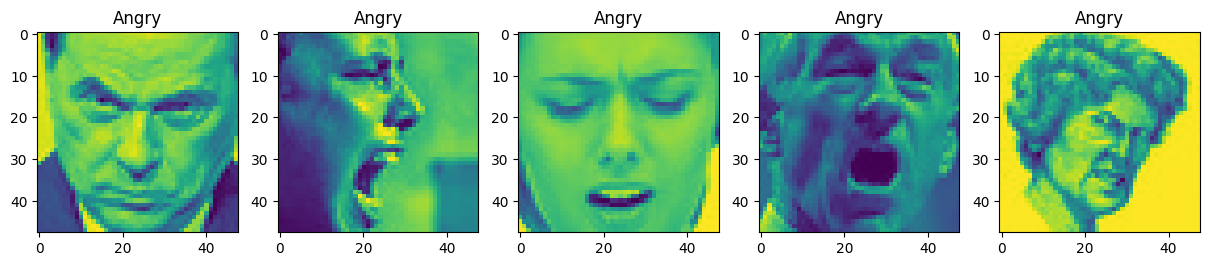

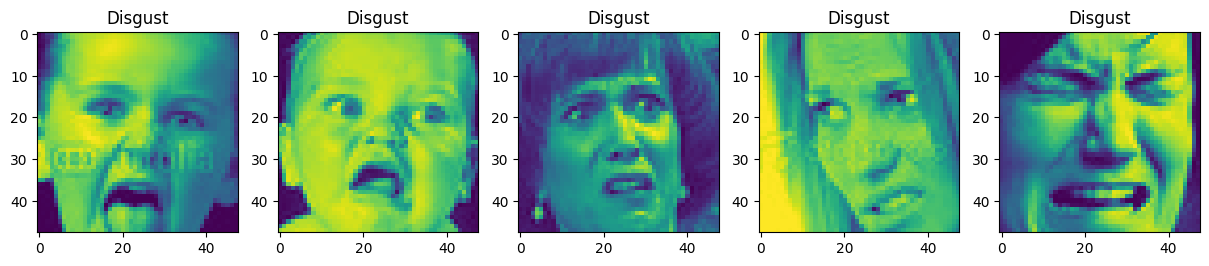

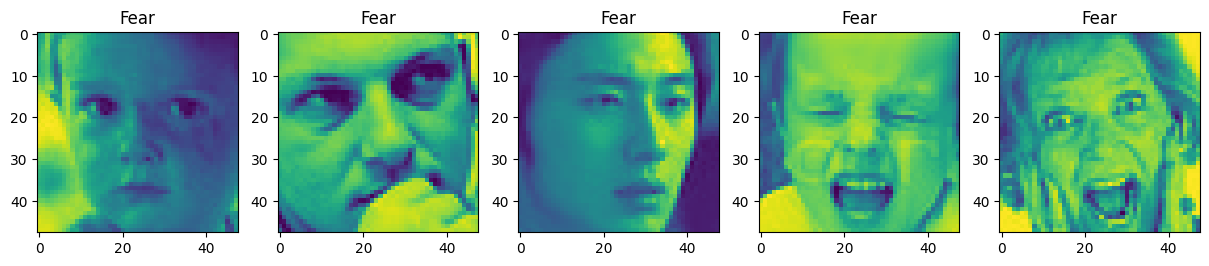

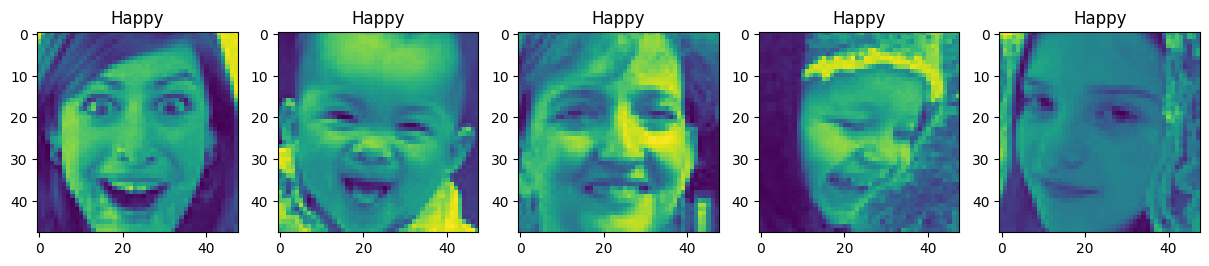

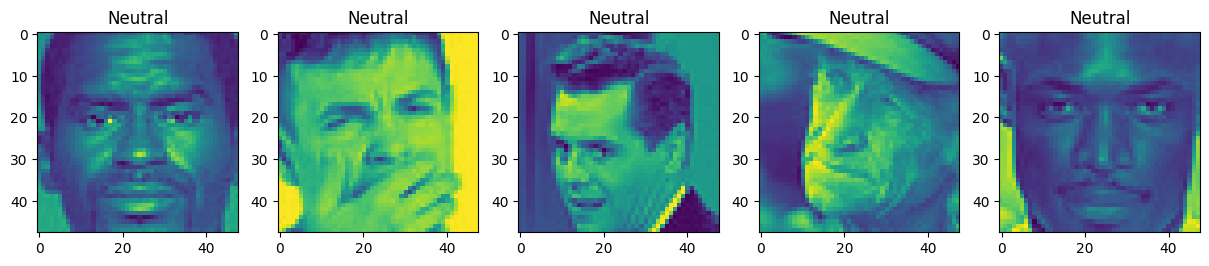

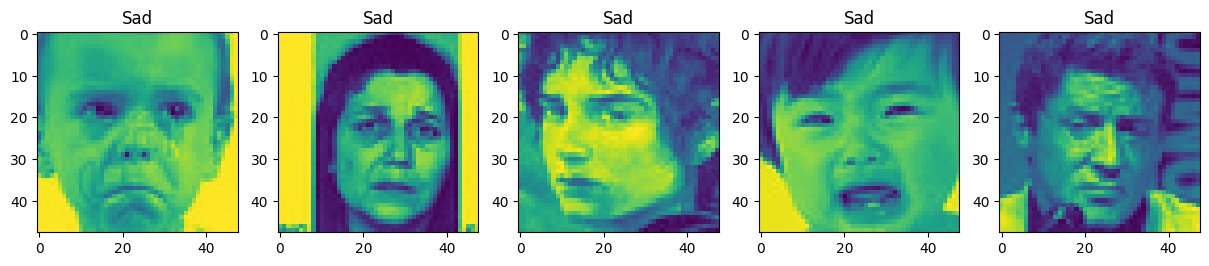

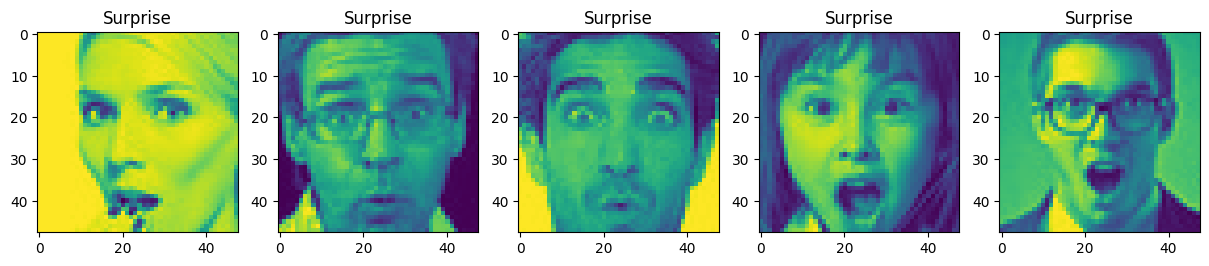

In [6]:
import random

def display_images(folder,label,n=5):
    plt.figure(figsize=(15,3))
    sample_files = random.sample(os.listdir(folder),n)
    for i,img_name in enumerate(sample_files):
        img_path = os.path.join(folder,img_name)
        img = Image.open(img_path)
        plt.subplot(1,n,i+1)
        plt.title(label)
        plt.imshow(img)
    plt.show()
display_images(angry_train,'Angry')
display_images(disgust_train,'Disgust')
display_images(fear_train,'Fear')
display_images(happy_train,'Happy')
display_images(neutral_train,'Neutral')
display_images(sad_train,'Sad')
display_images(surprise_train,'Surprise')  

# Data Preprocessing for CNN Model

In [7]:
IMAGE_SIZE = (48, 48)
BATCH_SIZE = 64
COLOR_MODE = "grayscale"

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(
    rescale=1./255
)

2025-12-31 04:04:42.642968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767153882.826075      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767153882.880289      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767153883.305604      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767153883.305659      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767153883.305662      24 computation_placer.cc:177] computation placer alr

In [9]:
train_data = train_gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode=COLOR_MODE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_data = val_gen.flow_from_directory(
    validation_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode=COLOR_MODE,
    class_mode='categorical',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Implementing CNN Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Activation, Dropout, Dense, GlobalAveragePooling2D


In [11]:
num_classes = 7

model = Sequential()

# Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

# Block 4
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

# Head
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

I0000 00:00:1767153901.454742      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,030,151 (3.93 MB)

 Trainable params: 1,028,743 (3.92 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [12]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping and Learning Rate Scheduler

**ReduceLROnPlateau** is used for reducing the *Learning rate* automatically when the model stops improving, allowing more finer and stable learning

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=4,
    min_lr=1e-6
)

In [14]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/50


I0000 00:00:1767153908.192902      81 service.cc:152] XLA service 0x78ed340143f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767153908.192950      81 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1767153908.878301      81 cuda_dnn.cc:529] Loaded cuDNN version 91002


  1/451 ━━━━━━━━━━━━━━━━━━━━ 1:17:10 10s/step - accuracy: 0.1719 - loss: 2.2536

I0000 00:00:1767153915.176457      81 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


451/451 ━━━━━━━━━━━━━━━━━━━━ 256s 545ms/step - accuracy: 0.2108 - loss: 1.9528 - val_accuracy: 0.1886 - val_loss: 1.8800 - learning_rate: 1.0000e-04
Epoch 2/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 43s 96ms/step - accuracy: 0.2524 - loss: 1.7928 - val_accuracy: 0.2753 - val_loss: 1.7672 - learning_rate: 1.0000e-04
Epoch 3/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 43s 94ms/step - accuracy: 0.2654 - loss: 1.7680 - val_accuracy: 0.2812 - val_loss: 1.7696 - learning_rate: 1.0000e-04
Epoch 4/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.2916 - loss: 1.7356 - val_accuracy: 0.3256 - val_loss: 1.6589 - learning_rate: 1.0000e-04
Epoch 5/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.3135 - loss: 1.7082 - val_accuracy: 0.3523 - val_loss: 1.6083 - learning_rate: 1.0000e-04
Epoch 6/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.3369 - loss: 1.6676 - val_accuracy: 0.3695 - val_loss: 1.5718 - learning_rate: 1.0000e-04
Epoch 7/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accur

# Classification Report of CNN Model

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_data.reset()

y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_data.classes

class_names = list(val_data.class_indices.keys())

111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step


In [16]:
print("Classification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=4
))

Classification Report:

              precision    recall  f1-score   support

       angry     0.4332    0.4698    0.4508       960
     disgust     0.6667    0.0360    0.0684       111
        fear     0.4938    0.1552    0.2362      1018
       happy     0.7870    0.8279    0.8069      1825
     neutral     0.4308    0.7393    0.5444      1216
         sad     0.4766    0.3758    0.4202      1139
    surprise     0.6952    0.6926    0.6939       797

    accuracy                         0.5665      7066
   macro avg     0.5690    0.4710    0.4601      7066
weighted avg     0.5731    0.5665    0.5444      7066



# Data Preprocessing for Transfer Learning

In [17]:
image_size = (224, 224)
input_shape = (224, 224, 3)

In [18]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb',   
    shuffle=True
)

val_data = val_gen.flow_from_directory(
    validation_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Implementing EfficientNetB0

In [19]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [20]:
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output = Dense(7, activation='softmax')(x)

model = Model(base_model.input, output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#model.summary()

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-6
)

In [23]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 337s 175ms/step - accuracy: 0.2201 - loss: 1.8804 - val_accuracy: 0.3387 - val_loss: 1.6892 - learning_rate: 1.0000e-04
Epoch 2/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 294s 163ms/step - accuracy: 0.3207 - loss: 1.7053 - val_accuracy: 0.3581 - val_loss: 1.6469 - learning_rate: 1.0000e-04
Epoch 3/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 296s 164ms/step - accuracy: 0.3521 - loss: 1.6439 - val_accuracy: 0.3797 - val_loss: 1.6103 - learning_rate: 1.0000e-04
Epoch 4/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 292s 162ms/step - accuracy: 0.3651 - loss: 1.6154 - val_accuracy: 0.3814 - val_loss: 1.5991 - learning_rate: 1.0000e-04
Epoch 5/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 294s 163ms/step - accuracy: 0.3716 - loss: 1.6053 - val_accuracy: 0.3906 - val_loss: 1.5759 - learning_rate: 1.0000e-04
Epoch 6/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 296s 164ms/step - accuracy: 0.3857 - loss: 1.5801 - val_accuracy: 0.3947 - val_loss: 1.5640 - learning_rate: 1.0000e-04
Epoch 7/30
1802/1802 ━━━━━━━

In [24]:
val_data.reset()

y_pred_probs2 = model.predict(val_data)
y_pred2 = np.argmax(y_pred_probs2, axis=1)
y_true2 = val_data.classes

class_names2 = list(val_data.class_indices.keys())

442/442 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step


# EfficientNetB0 Classification Report

In [25]:
print("EfficientNetB0 Classification Report:\n")
print(classification_report(
    y_true2,
    y_pred2,
    target_names=class_names2,
    digits=4
))

EfficientNetB0 Classification Report:

              precision    recall  f1-score   support

       angry     0.3629    0.1448    0.2070       960
     disgust     0.0000    0.0000    0.0000       111
        fear     0.3924    0.1218    0.1859      1018
       happy     0.5012    0.6959    0.5827      1825
     neutral     0.4064    0.4194    0.4128      1216
         sad     0.3062    0.5294    0.3880      1139
    surprise     0.6227    0.4743    0.5385       797

    accuracy                         0.4280      7066
   macro avg     0.3703    0.3408    0.3307      7066
weighted avg     0.4248    0.4280    0.3997      7066



# Fine-Tunning the EfficientNetB0

Handling **class imbalance** 
A model can get high accuracy by predicting only the majority class. In Facial Expression Recognition class imbalance handling is crucial because expression like disgust and fear which has minor differnces can stop the model from getting it's optimal performance.


***compute_class_weight*** computes weights for each class and higher sample class will get low value and lower sample class will get high value.



In [26]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)

class_weights = dict(enumerate(class_weights))

In [27]:
import tensorflow as tf

base_model.trainable = True

# Freeze BN layers
for layer in base_model.layers:
    if isinstance(layer,tf.keras.layers.BatchNormalization):
        layer.trainable = False

# Unfreezing the last 30 Layers, these layers learn task-specific features
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(5e-6),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop, lr_reduce],
    class_weight=class_weights
)


Epoch 1/20


2025-12-31 07:12:20.547379: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-31 07:12:20.735306: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-31 07:12:20.921515: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-31 07:12:21.110605: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-31 07:12:21.575446: E external/local_xla/xla/stream_

 252/1802 ━━━━━━━━━━━━━━━━━━━━ 4:17 166ms/step - accuracy: 0.2730 - loss: 1.8584

2025-12-31 07:13:30.110011: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-31 07:13:30.297916: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-31 07:13:30.700754: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-31 07:13:30.907706: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-31 07:13:31.114496: E external/local_xla/xla/stream_

1802/1802 ━━━━━━━━━━━━━━━━━━━━ 415s 203ms/step - accuracy: 0.2997 - loss: 1.8053 - val_accuracy: 0.4029 - val_loss: 1.6532 - learning_rate: 5.0000e-06
Epoch 2/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 316s 175ms/step - accuracy: 0.3844 - loss: 1.6556 - val_accuracy: 0.4745 - val_loss: 1.5261 - learning_rate: 5.0000e-06
Epoch 3/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 309s 171ms/step - accuracy: 0.4293 - loss: 1.5858 - val_accuracy: 0.5048 - val_loss: 1.4699 - learning_rate: 5.0000e-06
Epoch 4/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 311s 173ms/step - accuracy: 0.4609 - loss: 1.5166 - val_accuracy: 0.5252 - val_loss: 1.4334 - learning_rate: 5.0000e-06
Epoch 5/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 312s 173ms/step - accuracy: 0.4773 - loss: 1.4939 - val_accuracy: 0.5395 - val_loss: 1.4035 - learning_rate: 5.0000e-06
Epoch 6/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 323s 179ms/step - accuracy: 0.4903 - loss: 1.4751 - val_accuracy: 0.5568 - val_loss: 1.3731 - learning_rate: 5.0000e-06
Epoch 7/20
1802/1802 ━━━━━━━━━━━━━━━━━━

# Fine-tuned EfficientNetB0 Classification Report

In [28]:
val_data.reset()

fine_y_pred_probs = model.predict(val_data)
y_pred_fine = np.argmax(y_pred_probs2, axis=1)
y_true_fine = val_data.classes

class_names = list(val_data.class_indices.keys())

print("Fine-Tuned EfficientNetB0 Classification Report:\n")
print(classification_report(
    y_true_fine,
    y_pred_fine,
    target_names=class_names,
    digits=4
))

442/442 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step
Fine-Tuned EfficientNetB0 Classification Report:

              precision    recall  f1-score   support

       angry     0.3629    0.1448    0.2070       960
     disgust     0.0000    0.0000    0.0000       111
        fear     0.3924    0.1218    0.1859      1018
       happy     0.5012    0.6959    0.5827      1825
     neutral     0.4064    0.4194    0.4128      1216
         sad     0.3062    0.5294    0.3880      1139
    surprise     0.6227    0.4743    0.5385       797

    accuracy                         0.4280      7066
   macro avg     0.3703    0.3408    0.3307      7066
weighted avg     0.4248    0.4280    0.3997      7066

